## Part 1 Cleaning numerical data

1. Import the necessary libraries.

In [337]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [338]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info).

In [4]:
print(customer_df.shape)
customer_df.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case). (lowercase with _ for spaces)

In [339]:
new_names =[]
for col in list(customer_df.columns):
    col = re.sub(' ', '_', col.lower())
    new_names.append(col)
    
customer_df.columns = new_names

In [340]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change effective to date column to datetime format.

In [47]:
customer_df.effective_to_date

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

In [341]:
customer_df.effective_to_date  = pd.to_datetime(customer_df.effective_to_date)
customer_df.effective_to_date

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [284]:
customer_df.effective_to_date.nunique()

59

6. Check NaN values per column.

In [342]:
customer_df.isnull().sum()  #no NaN values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [108]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [503]:
def diff(x):
    if x.nunique()>=10:
        return 'continuous'
    elif x.nunique()<10:
        return 'discrete'



In [505]:
discrete = [x for x in list(customer_df.columns) if customer_df[x].nunique()<10]
discrete

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [506]:
continuous = [x for x in list(customer_df.columns) if (diff(customer_df[x]) == 'continuous') and customer_df[x].dtype == 'int64' or customer_df[x].dtype == 'float64']
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'total_claim_amount']

In [536]:
categorical = [x for x in list(customer_df.columns) if customer_df[x].dtype == 'O']
categorical

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

8 For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [537]:
categorical = customer_df[categorical]

In [538]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [163]:
categorical.state.value_counts()
categorical.response.value_counts()
categorical.coverage.value_counts()
categorical.education.value_counts()
categorical.employmentstatus.value_counts()
categorical.gender.value_counts()
categorical.location_code.value_counts()
categorical.marital_status.value_counts()
categorical.policy_type.value_counts()
categorical.policy.value_counts()
categorical.renew_offer_type.value_counts()
categorical.sales_channel.value_counts()
categorical.vehicle_class.value_counts()
categorical.vehicle_size.value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

No unusual values in the categorical fields.

9. Get categorical features.

In [539]:
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


10. What should we do with the customer_id column?

In [331]:
customer_df['customer_alpha'] = customer_df['customer'].apply(lambda re.findall('[\D*]', x) for x)

SyntaxError: invalid syntax (1989020797.py, line 1)

The customer column should be dropped as it contains all unique values and there is no documentaion about any info it might hold. 

In [540]:
categorical.drop(['customer'], axis=1, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## PART 2 OF LAB: Cleaning categorical data

1. Import the necessary libraries if you are starting a new notebook

Already done, see #1 of part 1 of lab.

2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [508]:
continuous_df = customer_df[continuous]
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [509]:
discrete_numerical = [x for x in discrete if customer_df[x].dtype != 'O']
discrete_df = customer_df[discrete_numerical]
discrete_df

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


3. Plot a correlation matrix, what can you see?

In [512]:
cm_discrete = discrete_df.corr()
cm_discrete

,number_of_open_complaints,number_of_policies
number_of_open_complaints,1.000000,0.001498
number_of_policies,0.001498,1.000000


In [513]:
cm_continuous = continuous_df.corr()
cm_continuous

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,0.003335
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,1.000000


I am not seeing any multicolinearity between features.

4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

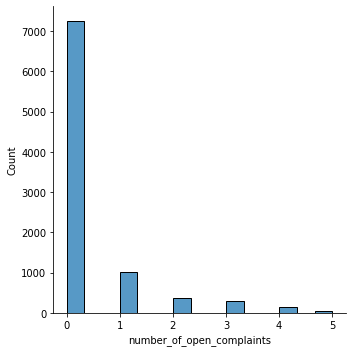

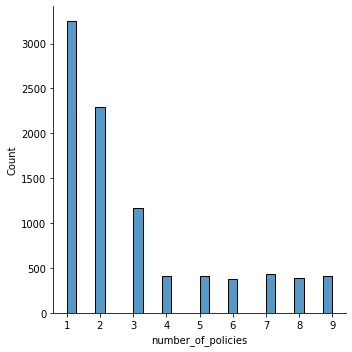

In [514]:
def discrete_plots(df):
    for c in list(df.columns):
        sns.displot(df[c])
    plt.show()
    return 
    
discrete_plots(discrete_df)    
    

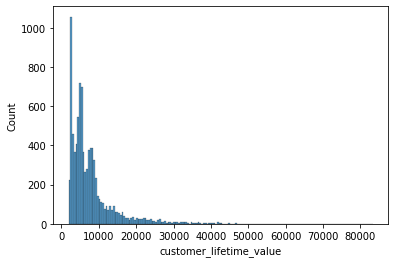

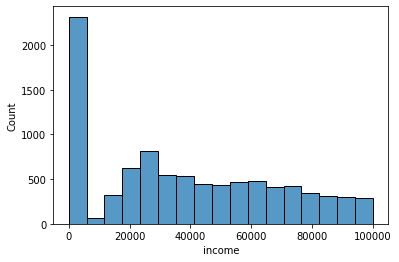

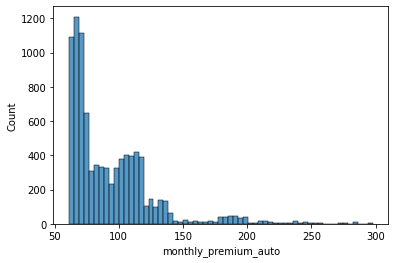

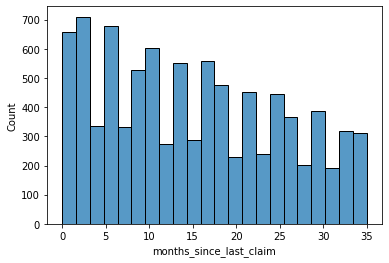

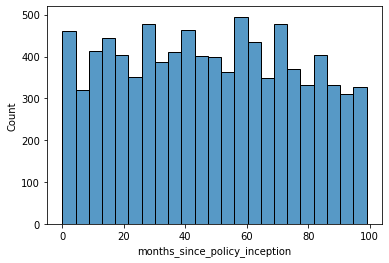

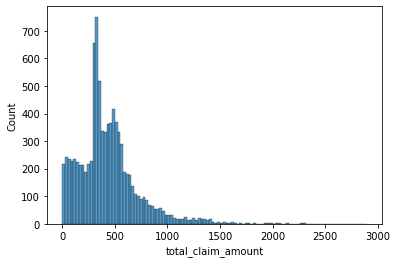

In [515]:
def continuous_plots(df):
    for c in list(df.columns):
        sns.histplot(df[c])
        plt.show()
    return 
    
continuous_plots(continuous_df) 

5. What can you see in the plots?

Distribution is not normal, a lot of the features are right-skewed.

6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


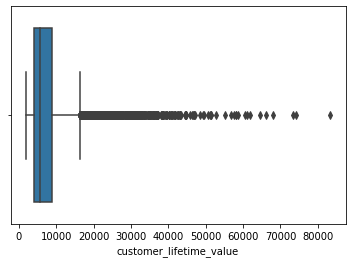

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


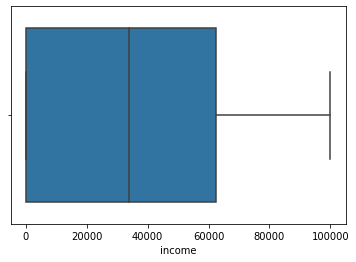

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


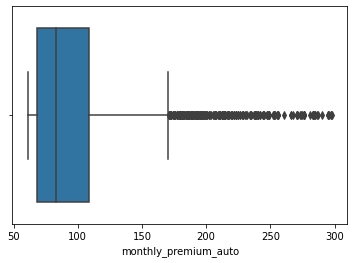

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


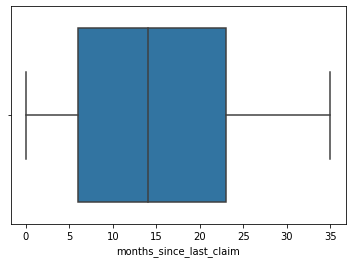

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


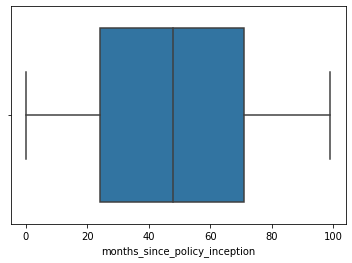

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


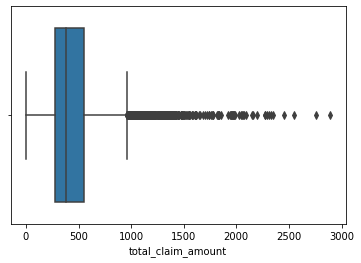

In [516]:
def make_boxplots(df):
    for c in list(df.columns):
        sns.boxplot(df[c])
        plt.show()
    return 
    
make_boxplots(continuous_df)

In [517]:
#customer_lifetime_value
iqr_clv = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr_clv
print(upper_limit)  #16414

extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit]
len(extraordinary_points) #817
len(extraordinary_points)/len(continuous_df) #8.9%

16414.039911750002


0.08944602583753011

Outliers represent 8.9% of total values for the feature customer_lifetime_value.

In [518]:
# monthly_premium_auto
iqr_mpa = np.percentile(continuous_df['monthly_premium_auto'],75) - np.percentile(continuous_df['monthly_premium_auto'],25)
upper_limit = np.percentile(continuous_df['monthly_premium_auto'],75) + 1.5*iqr_mpa
print(upper_limit)  #170.5

extraordinary_points = discrete_df[continuous_df['monthly_premium_auto'] > upper_limit]
len(extraordinary_points)  #430
len(extraordinary_points)/len(continuous_df)  # 4.7%

170.5


0.047076855703963215

Outliers represent 4.7% of the total values for monthly_premium_auto.

7. Have you found outliers? If you have, what should we do with them?

We can use logartithmic transformation on customer_lifetime_value and monthly_premium_auto to reduce the outliers.

In [359]:
def log_transfom_clean(x):   
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

/var/folders/tg/qj8xd12d4kldbd9gnfgt88th0000gn/T/ipykernel_30471/2451702290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df['log_customer_lifetime_value'] = continuous_df['customer_lifetime_value'].apply(log_transfom_clean)


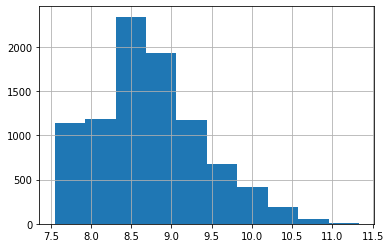

In [519]:
continuous_df['log_customer_lifetime_value'] = continuous_df['customer_lifetime_value'].apply(log_transfom_clean)
continuous_df['log_customer_lifetime_value'].hist()
plt.show()

In [520]:
iqr_clv = np.percentile(continuous_df['log_customer_lifetime_value'],75) - np.percentile(continuous_df['log_customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['log_customer_lifetime_value'],75) + 1.5*iqr_clv
print(upper_limit)  #10.3

extraordinary_points = continuous_df[continuous_df['log_customer_lifetime_value'] > upper_limit]
len(extraordinary_points) #185
len(extraordinary_points)/len(continuous_df)  # 2%

10.313001003057334


0.020253996058681847

Logarithmic transformation reduced the outliers to 2%, I think it would be best to remove the outliers at this point.

In [521]:
continuous_df = continuous_df[continuous_df.log_customer_lifetime_value <= upper_limit]

In [522]:
continuous_df #now 8949 rows, kept original index

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,log_customer_lifetime_value
0,2763.519279,56274,69,32,5,384.811147,7.924260
1,6979.535903,0,94,13,42,1131.464935,8.850738
2,12887.431650,48767,108,18,38,566.472247,9.464008
3,7645.861827,0,106,18,65,529.881344,8.941920
4,2813.692575,43836,73,12,44,138.130879,7.942253
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764,10.060747
9130,3096.511217,21604,79,14,28,379.200000,8.038031
9131,8163.890428,0,85,9,37,790.784983,9.007476
9132,7524.442436,21941,96,34,3,691.200000,8.925912


In [523]:
continuous_df.drop(['customer_lifetime_value'], axis=1, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


/var/folders/tg/qj8xd12d4kldbd9gnfgt88th0000gn/T/ipykernel_30471/2203454677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df['log_monthly_premium_auto'] = continuous_df['monthly_premium_auto'].apply(log_transfom_clean)


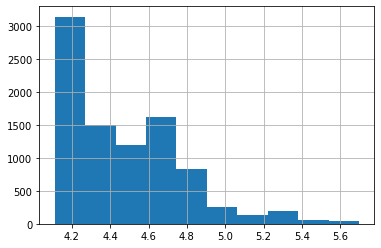

In [524]:
continuous_df['log_monthly_premium_auto'] = continuous_df['monthly_premium_auto'].apply(log_transfom_clean)
continuous_df['log_monthly_premium_auto'].hist()
plt.show()

In [527]:
iqr_clv = np.percentile(continuous_df['log_monthly_premium_auto'],75) - np.percentile(continuous_df['log_monthly_premium_auto'],25)
upper_limit = np.percentile(continuous_df['log_monthly_premium_auto'],75) + 1.5*iqr_clv
print(upper_limit)  #5.38

extraordinary_points = continuous_df[continuous_df['log_monthly_premium_auto'] > upper_limit]
len(extraordinary_points) #99
len(extraordinary_points)/len(continuous_df) # 1.1%

5.376066510046389


0.011062688568555145

Outliers represent 1.2% of total values for monthly_premium_auto after log transformation. Dropping those outliers.

In [528]:
continuous_df = continuous_df[continuous_df.log_monthly_premium_auto <= upper_limit]

In [529]:
continuous_df #now 8850 rows

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,log_customer_lifetime_value,log_monthly_premium_auto
0,56274,69,32,5,384.811147,7.924260,4.234107
1,0,94,13,42,1131.464935,8.850738,4.543295
2,48767,108,18,38,566.472247,9.464008,4.682131
3,0,106,18,65,529.881344,8.941920,4.663439
4,43836,73,12,44,138.130879,7.942253,4.290459
...,...,...,...,...,...,...,...
9129,71941,73,18,89,198.234764,10.060747,4.290459
9130,21604,79,14,28,379.200000,8.038031,4.369448
9131,0,85,9,37,790.784983,9.007476,4.442651
9132,21941,96,34,3,691.200000,8.925912,4.564348


In [530]:
continuous_df.drop(['monthly_premium_auto'], axis=1, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8. Check nan values per column.

In [531]:
discrete_df.isna().sum()

number_of_open_complaints    0
number_of_policies           0
dtype: int64

In [532]:
continuous_df.isna().sum()

income                           0
months_since_last_claim          0
months_since_policy_inception    0
total_claim_amount               0
log_customer_lifetime_value      0
log_monthly_premium_auto         0
dtype: int64

In [541]:
categorical.isna().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

See #7 in part 1 of lab.

10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

See #8 in part1 of lab.

11. Get categorical features.

See #9 in part 1 of lab.

12. What should we do with the customer id column?

See #10 in part 1 of lab.

## Feature Extraction

1. Open the categoricals variable we created before.

In [542]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


2. Plot all the categorical variables with the proper plot. What can you see?

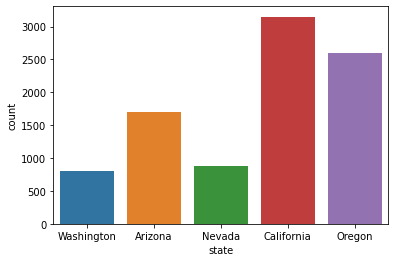

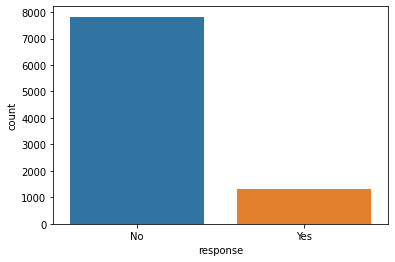

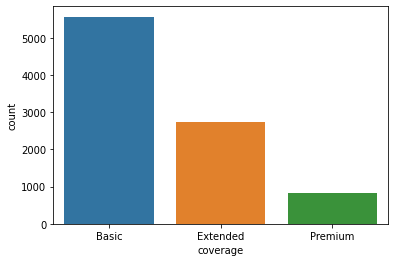

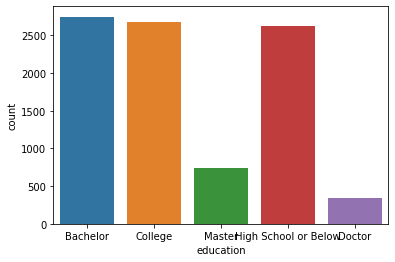

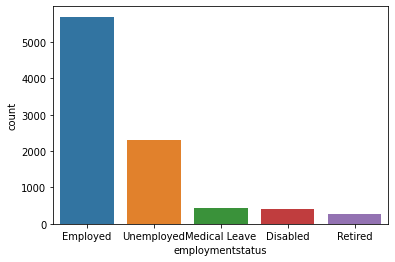

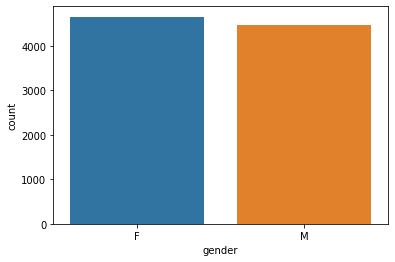

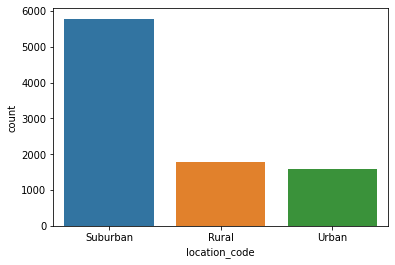

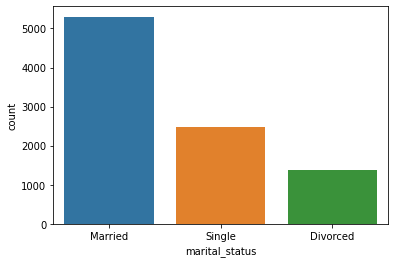

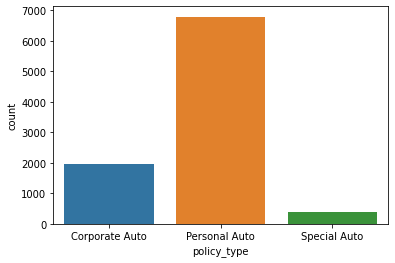

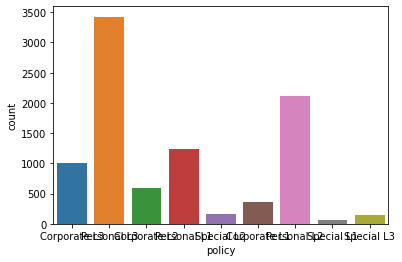

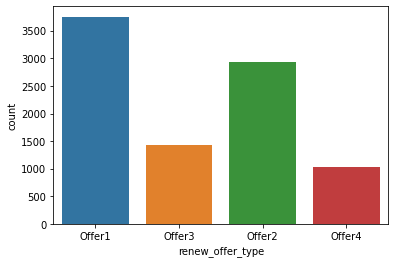

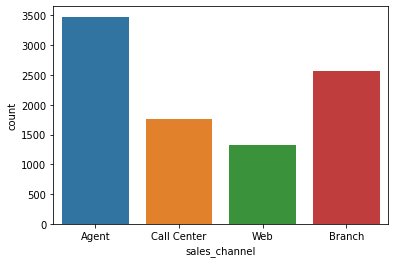

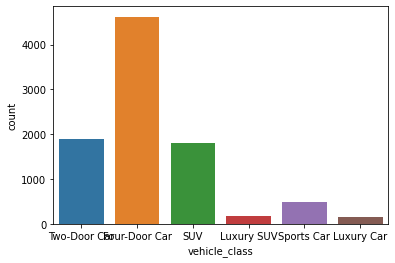

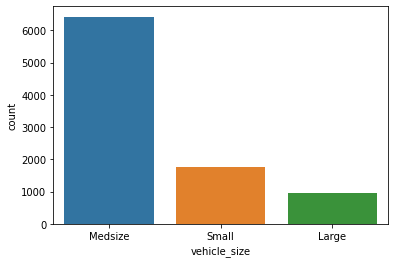

In [543]:
sns.countplot(x=categorical['state'])
plt.show()
sns.countplot(x=categorical['response'])
plt.show()
sns.countplot(x=categorical['coverage'])
plt.show()
sns.countplot(x=categorical['education'])
plt.show()
sns.countplot(x=categorical['employmentstatus'])
plt.show()
sns.countplot(x=categorical['gender'])
plt.show()
sns.countplot(x=categorical['location_code'])
plt.show()
sns.countplot(x=categorical['marital_status'])
plt.show()
sns.countplot(x=categorical['policy_type'])
plt.show()
sns.countplot(x=categorical['policy'])
plt.show()
sns.countplot(x=categorical['renew_offer_type'])
plt.show()
sns.countplot(x=categorical['sales_channel'])
plt.show()
sns.countplot(x=categorical['vehicle_class'])
plt.show()
sns.countplot(x=categorical['vehicle_size'])
plt.show()

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [544]:
# policy vs policy_type
crosstab = pd.crosstab(categorical['policy'], categorical['policy_type'], margins = False)
crosstab

policy_type,Corporate Auto,Personal Auto,Special Auto
policy,,,
Corporate L1,359,0,0
Corporate L2,595,0,0
Corporate L3,1014,0,0
Personal L1,0,1240,0
Personal L2,0,2122,0
Personal L3,0,3426,0
Special L1,0,0,66
Special L2,0,0,164
Special L3,0,0,148


Policy_type info is repeated in the policy column. One of those features can be dropped.

In [545]:
categorical.drop(['policy_type'], axis=1, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4. Plot time variable. Can you extract something from it?

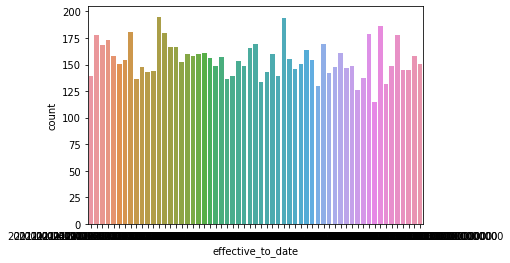

In [548]:
sns.countplot(x=customer_df['effective_to_date'])
plt.show()

In [250]:
discrete_df['effective_to_date'].nunique()  #59 different values
discrete_df['effective_to_date'].value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-02-01    154
2011-01-18    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-07    151
2011-01-25    151
2011-02-25    149
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-16    139
2011-02-13    139
2011-02-24    139
2011-02-09    137
2011-02-17    136
2011-01-22    136
2011-02-08    134
2011-02-20

There are 59 different values for the feature 'effective_to_date'. It would be a good idea to group them into smaller categories, maybe by month instead?

## Data cleaning and wrangling

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.


Outliers were already removed in #7 of Part 2. But see below for an example of a function that could be used 

In [440]:
def remove_outliers(df):
    for column in list(df.columns):
        iqr = np.percentile(df[column],75) - np.percentile(df[column],25)
        upper_limit = np.percentile(df[column],75) + 1.5*iqr
        lower_limit = np.percentile(df[column],25) - 1.5*iqr
        extraordinary_points = df[(df[column] > upper_limit) | (df[column] < lower_limit)]
        df = df[(df[column] <= upper_limit) & (df[column] >= lower_limit)]
    return df
        

2. Create a copy of the dataframe for the data wrangling.

In [562]:
cat = categorical.copy()
con = continuous_df.copy()
dis = discrete_df.copy()

3. Normalize the continuous variables. You can use any one method you want.

In [563]:
y = con.total_claim_amount
con.drop(['total_claim_amount'], axis=1, inplace=True)

In [551]:
con

,income,months_since_last_claim,months_since_policy_inception,log_customer_lifetime_value,log_monthly_premium_auto
0,56274,32,5,7.924260,4.234107
1,0,13,42,8.850738,4.543295
2,48767,18,38,9.464008,4.682131
3,0,18,65,8.941920,4.663439
4,43836,12,44,7.942253,4.290459
...,...,...,...,...,...
9129,71941,18,89,10.060747,4.290459
9130,21604,14,28,8.038031,4.369448
9131,0,9,37,9.007476,4.442651
9132,21941,34,3,8.925912,4.564348


In [564]:
#using MinMaxScales
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(con)
#con_normalized = transformer.transform(con)
con_normalized = pd.DataFrame(transformer.transform(con), columns=con.columns)


In [553]:
con_normalized

,income,months_since_last_claim,months_since_policy_inception,log_customer_lifetime_value,log_monthly_premium_auto
0,0.562847,0.914286,0.050505,0.135910,0.097463
1,0.000000,0.371429,0.424242,0.471063,0.341996
2,0.487763,0.514286,0.383838,0.692913,0.451800
3,0.000000,0.514286,0.656566,0.504048,0.437016
4,0.438443,0.342857,0.444444,0.142418,0.142032
...,...,...,...,...,...
8845,0.719547,0.514286,0.898990,0.908784,0.142032
8846,0.216081,0.400000,0.282828,0.177066,0.204503
8847,0.000000,0.257143,0.373737,0.527763,0.262398
8848,0.219452,0.971429,0.030303,0.498257,0.358647


4. Encode the categorical variables

In [554]:
cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [ ]:
#change to 1/0: response, gender

In [565]:
cat.response = cat.response.map({"Yes" : 1, "No" : 0})

In [566]:
cat.response

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: response, Length: 9134, dtype: int64

In [567]:
cat.gender = cat.gender.map({"F" : 1, "M" : 0})
cat.gender

0       1
1       1
2       1
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: gender, Length: 9134, dtype: int64

In [ ]:
#ordinal encoding: coverage, education, location_code, vehicle_size

In [568]:
cat.coverage = cat.coverage.map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
cat.coverage

0       0
1       1
2       2
3       0
4       0
       ..
9129    0
9130    1
9131    1
9132    1
9133    1
Name: coverage, Length: 9134, dtype: int64

In [570]:
cat.education = cat.education.map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master":3, "Doctor":4})
cat.education

0       2
1       2
2       2
3       2
4       2
       ..
9129    2
9130    1
9131    2
9132    1
9133    1
Name: education, Length: 9134, dtype: int64

In [572]:
cat.location_code = cat.location_code.map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
cat.location_code

0       1
1       1
2       1
3       1
4       0
       ..
9129    2
9130    1
9131    1
9132    1
9133    1
Name: location_code, Length: 9134, dtype: int64

In [574]:
cat.vehicle_size = cat.vehicle_size.map({"Small" : 0, "Medsize" : 1, "Large" : 2})
cat.vehicle_size

0       1
1       1
2       1
3       1
4       1
       ..
9129    1
9130    1
9131    1
9132    2
9133    1
Name: vehicle_size, Length: 9134, dtype: int64

In [ ]:
#OneHot encode: state, marital_status, employmentstatus(group lowest 3 cats together?), policy, renew_offer_type, sales_channel, vehicle_class

In [578]:
from sklearn.preprocessing import OneHotEncoder

In [580]:
#encode state
state = pd.DataFrame(cat['state'])
state_encoder = OneHotEncoder().fit(state)
encoded_state = pd.DataFrame(state_encoder.transform(state).toarray(),columns=state_encoder.categories_)

encoded_state = encoded_state.drop(['California'], axis=1)


In [582]:
#encode marital_status
ms = pd.DataFrame(cat['marital_status'])
ms_encoder = OneHotEncoder().fit(ms)
encoded_ms = pd.DataFrame(ms_encoder.transform(ms).toarray(),columns=ms_encoder.categories_)

encoded_ms = encoded_ms.drop(['Married'], axis=1)

In [584]:
#employmentstatus
#first group 3 smallest groups together as 'Other'
cat.employmentstatus = cat.employmentstatus.map({"Employed" : 'Employed', "Unemployed" : 'Unemployed', "Medical Leave" : 'Other', 'Disabled': 'Other', 'Retired': 'Other'})
cat.employmentstatus

0         Employed
1       Unemployed
2         Employed
3       Unemployed
4         Employed
           ...    
9129      Employed
9130      Employed
9131    Unemployed
9132      Employed
9133    Unemployed
Name: employmentstatus, Length: 9134, dtype: object

In [587]:
#then encode
es = pd.DataFrame(cat['employmentstatus'])
es_encoder = OneHotEncoder().fit(es)
encoded_es = pd.DataFrame(es_encoder.transform(es).toarray(),columns=es_encoder.categories_)

encoded_es = encoded_es.drop(['Employed'], axis=1)

In [589]:
#policy
pol = pd.DataFrame(cat['policy'])
pol_encoder = OneHotEncoder().fit(pol)
encoded_pol = pd.DataFrame(pol_encoder.transform(pol).toarray(),columns=pol_encoder.categories_)

encoded_pol = encoded_pol.drop(['Personal L3'], axis=1)

In [591]:
#renew_offer_type
rot = pd.DataFrame(cat['renew_offer_type'])
rot_encoder = OneHotEncoder().fit(rot)
encoded_rot = pd.DataFrame(rot_encoder.transform(rot).toarray(),columns=rot_encoder.categories_)

encoded_rot = encoded_rot.drop(['Offer1'], axis=1)

In [594]:
#sales_channel
sc = pd.DataFrame(cat['sales_channel'])
sc_encoder = OneHotEncoder().fit(sc)
encoded_sc = pd.DataFrame(sc_encoder.transform(sc).toarray(),columns=sc_encoder.categories_)

encoded_sc = encoded_sc.drop(['Agent'], axis=1)

In [596]:
#vehicle_class
vc = pd.DataFrame(cat['vehicle_class'])
vc_encoder = OneHotEncoder().fit(vc)
encoded_vc = pd.DataFrame(vc_encoder.transform(vc).toarray(),columns=vc_encoder.categories_)

encoded_vc = encoded_vc.drop(['SUV'], axis=1)

In [597]:
#drop all columns that from cat df that were just encoded
cat.drop(['state', 'marital_status', 'employmentstatus', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class'], axis=1, inplace=True)

In [599]:
#concat encoded columns to cat df
cat = pd.concat([cat, encoded_state, encoded_ms, encoded_es, encoded_pol, encoded_rot, encoded_sc, encoded_vc], axis=1)

In [601]:
cat

,response,coverage,education,gender,location_code,vehicle_size,"(Arizona,)","(Nevada,)","(Oregon,)","(Washington,)",...,"(Offer3,)","(Offer4,)","(Branch,)","(Call Center,)","(Web,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(Sports Car,)","(Two-Door Car,)"
0,0,0,2,1,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,2,1,1,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,2,2,1,1,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,2,0,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,2,0,0,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,2,0,2,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9130,1,1,1,1,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9131,0,1,2,0,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9132,0,1,1,0,1,2,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [602]:
dis

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [610]:
customer_df['etd_date'] = customer_df['effective_to_date'].dt.strftime('%d')
customer_df['etd_date'].astype(int)


0       24
1       31
2       19
3       20
4        3
        ..
9129    10
9130    12
9131     6
9132     3
9133    14
Name: etd_date, Length: 9134, dtype: int64

In [611]:
customer_df['etd_month'] = customer_df['effective_to_date'].dt.strftime('%m')
customer_df['etd_month'].astype(int)

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: etd_month, Length: 9134, dtype: int64

6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [614]:
X = pd.concat([continuous_df, discrete_df, cat], axis=1)

In [616]:
X['etd_month'] = customer_df['etd_month']
X['etd_date'] = customer_df['etd_date']

In [620]:
X.isnull().sum()

income                           0
months_since_last_claim          0
months_since_policy_inception    0
total_claim_amount               0
log_customer_lifetime_value      0
log_monthly_premium_auto         0
number_of_open_complaints        0
number_of_policies               0
response                         0
coverage                         0
education                        0
gender                           0
location_code                    0
vehicle_size                     0
(Arizona,)                       0
(Nevada,)                        0
(Oregon,)                        0
(Washington,)                    0
(Divorced,)                      0
(Single,)                        0
(Other,)                         0
(Unemployed,)                    0
(Corporate L1,)                  0
(Corporate L2,)                  0
(Corporate L3,)                  0
(Personal L1,)                   0
(Personal L2,)                   0
(Special L1,)                    0
(Special L2,)       

In [619]:
#remove rows with NaN (from outliers dropped from continuous features) 
X = X[~X.income.isnull()]

In [621]:
X

,income,months_since_last_claim,months_since_policy_inception,total_claim_amount,log_customer_lifetime_value,log_monthly_premium_auto,number_of_open_complaints,number_of_policies,response,coverage,...,"(Branch,)","(Call Center,)","(Web,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(Sports Car,)","(Two-Door Car,)",etd_month,etd_date
0,56274.0,32.0,5.0,384.811147,7.924260,4.234107,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,02,24
1,0.0,13.0,42.0,1131.464935,8.850738,4.543295,0,8,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,01,31
2,48767.0,18.0,38.0,566.472247,9.464008,4.682131,0,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,02,19
3,0.0,18.0,65.0,529.881344,8.941920,4.663439,0,7,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,01,20
4,43836.0,12.0,44.0,138.130879,7.942253,4.290459,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,02,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,71941.0,18.0,89.0,198.234764,10.060747,4.290459,0,2,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,02,10
9130,21604.0,14.0,28.0,379.200000,8.038031,4.369448,0,1,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,02,12
9131,0.0,9.0,37.0,790.784983,9.007476,4.442651,3,2,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,02,06
9132,21941.0,34.0,3.0,691.200000,8.925912,4.564348,0,3,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,02,03
